In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [130]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [131]:
train_df.shape

(1460, 81)

In [132]:
train_df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [133]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [134]:
print('\n No. of NULL rows in every column:\n')
train_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)


 No. of NULL rows in every column:



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

**Let's remove the columns with high NULL values:**

In [135]:
train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

In [136]:
print('\n No. of NULL rows in every column:\n')
test_df.isnull().sum()[test_df.isnull().sum()>0].sort_values(ascending=False)


 No. of NULL rows in every column:



PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [137]:
test_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

Replace NULL values in other columns with the mean value of this column.

In [138]:
train_df.fillna(train_df.mean(), inplace =True)
test_df.fillna(train_df.mean(), inplace =True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [139]:
train_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64

In [140]:
test_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)

GarageFinish    78
GarageQual      78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
Electrical       0
dtype: int64

Text(0.5, 1.0, 'Houses sale prices')

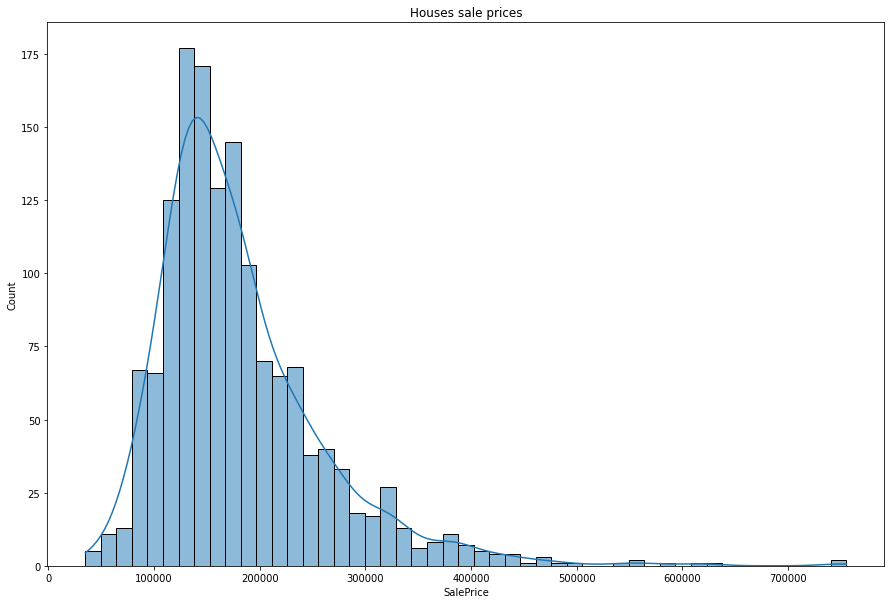

In [141]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize = (15,10))
sns.histplot(train_df['SalePrice'],kde=True)
plt.title('Houses sale prices')

***There is a chance that non-numeric column have data that can help us predict the price of a house with more precision. the problem is, that the ML models need the data in numeric form. let's convert the data of this columns to numeric values.**

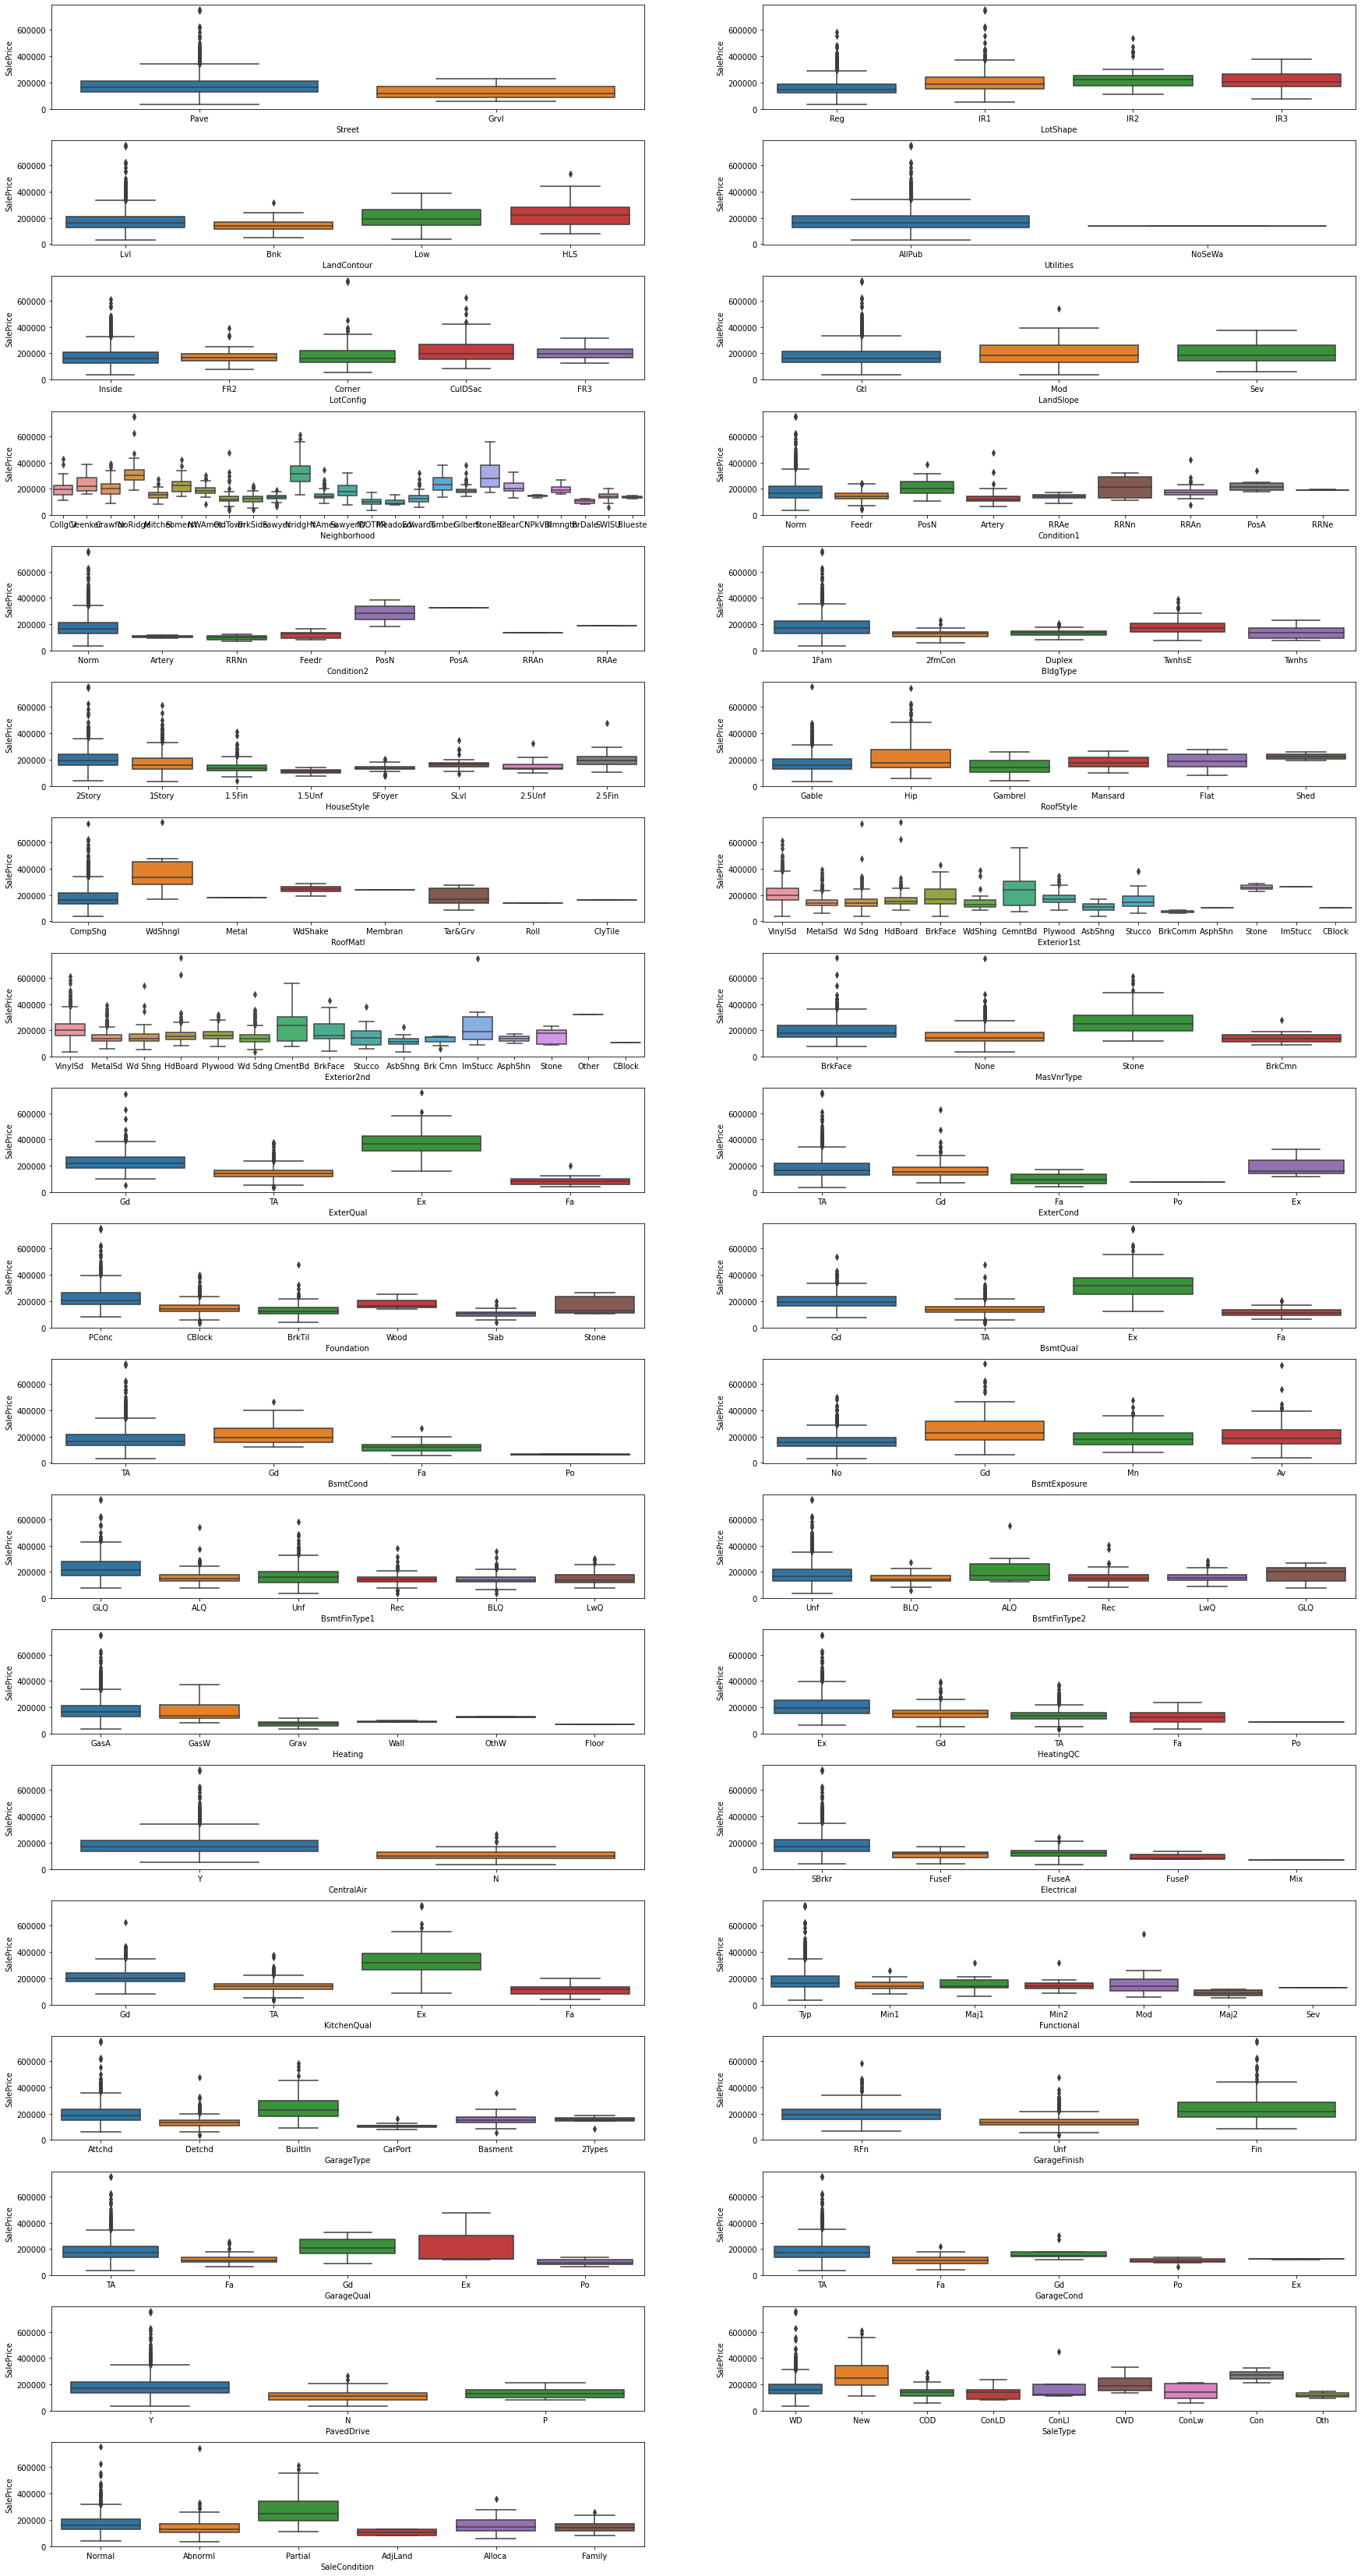

In [142]:
categorical_cols_df = train_df.select_dtypes(include='object')
cols = categorical_cols_df.columns
fig = plt.figure(figsize = (30,60))
fig.subplots_adjust(hspace=0.3)
len(cols)
for i in range(1,38):
    plt.subplot(19, 2, i)
    sns.boxplot(x=cols[i], y='SalePrice', data= train_df)

**We can see that in many column with categorical data there is a big differences that we can transform to numeric data and use it for better predictions.**

In [143]:
# figure(figsize = (8,8))
# sns.boxplot(x='Street',y='SalePrice', data=train_df)
# figure(figsize = (8,8))
# sns.boxplot(x='LotShape',y='SalePrice', data=train_df)
# figure(figsize = (8,8))
# sns.boxplot(x='LotConfig',y='SalePrice', data=train_df)
# figure(figsize = (8,8))
# sns.boxplot(x='LandSlope',y='SalePrice', data=train_df)
# figure(figsize = (8,8))
# sns.boxplot(x='Condition1',y='SalePrice', data=train_df)
# figure(figsize = (8,8))
# sns.boxplot(x='BldgType',y='SalePrice', data=train_df)
# figure(figsize = (8,8))
# sns.barplot(x='HouseStyle',y='SalePrice',data = train_df, order = order_HouseStyle)
# figure(figsize = (8,8))
# sns.barplot(x='MSZoning',y='SalePrice',data = train_df, order = order_MSZoning)
# plt.figure(figsize = (20,10))
# sns.barplot(x='Neighborhood',y='SalePrice',data = train_df, order = order_neighborhood)
train_df['Street'] = train_df['Street'].map({'Grvl':0,'Pave':1})
test_df['Street'] = test_df['Street'].map({'Grvl':0,'Pave':1})
train_df['LotShape'] = train_df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2, 'IR3':2})
test_df['LotShape'] = test_df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2, 'IR3':2})
train_df['Utilities'] = train_df['Utilities'].map({'AllPub':1,'NoSeWa':0})
test_df['Utilities'] = test_df['Utilities'].map({'AllPub':1,'NoSeWa':0})
train_df['LotConfig'] = train_df['LotConfig'].map({'Inside':0,'FR2':0,'Corner':0,'CulDSac':1,'FR3':1})
test_df['LotConfig'] = test_df['LotConfig'].map({'Inside':0,'FR2':0,'Corner':0,'CulDSac':1,'FR3':1})
train_df['LandSlope'] = train_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':1})
test_df['LandSlope'] = test_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':1})
train_df['BldgType'] = train_df['BldgType'].map({'1Fam':1,'2fmCon':0,'Duplex':0, 'TwnhsE':1, 'Twnhs':0})
test_df['BldgType'] = test_df['BldgType'].map({'1Fam':1,'2fmCon':0,'Duplex':0, 'TwnhsE':1, 'Twnhs':0})

order_HouseStyle = train_df.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=True).index.values
train_df['HouseStyle'] = train_df['HouseStyle'].map({'1.5Unf':0,'SFoyer':1,'1.5Fin':2, '2.5Unf':3, 'SLvl':4, '1Story':5, '2Story':6, '2.5Fin':7})
test_df['HouseStyle'] = test_df['HouseStyle'].map({'1.5Unf':0,'SFoyer':1,'1.5Fin':2, '2.5Unf':3, 'SLvl':4, '1Story':5, '2Story':6, '2.5Fin':7})

order_MSZoning = train_df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=True).index.values
train_df['MSZoning'] = train_df['MSZoning'].fillna('RH')
test_df['MSZoning'] = test_df['MSZoning'].fillna('RH')
train_df['MSZoning'] = train_df['MSZoning'].map({'C (all)':0, 'RM':1, 'RH':2, 'RL':3, 'FV':4})
test_df['MSZoning'] = test_df['MSZoning'].map({'C (all)':0, 'RM':1, 'RH':2, 'RL':3, 'FV':4})

order_neighborhood = train_df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=True).index.values
train_df['Neighborhood'].replace(to_replace=order_neighborhood, value=list(range(0,25)), inplace = True)
test_df['Neighborhood'].replace(to_replace=order_neighborhood, value=list(range(0,25)), inplace = True)

In [144]:
test_df['Street'].value_counts()
test_df['LotShape'].value_counts()
train_df['Utilities'].value_counts()
train_df['LotConfig'].value_counts()
test_df['LotConfig'].value_counts()
test_df['LandSlope'].value_counts()
train_df['BldgType'].value_counts()
train_df['BldgType'].value_counts()
train_df['HouseStyle'].value_counts()
train_df['MSZoning'].value_counts()
test_df['MSZoning'].value_counts()
train_df['Neighborhood'].value_counts()
test_df['Neighborhood'].value_counts()

10    218
5     126
16    117
19     96
4      94
23     89
14     86
6      77
12     66
11     65
13     58
1      56
17     52
3      50
21     34
24     30
22     26
8      23
0      20
18     16
2      14
9      14
20     13
15     11
7       8
Name: Neighborhood, dtype: int64

In [145]:
test_df['MSZoning'].isnull().sum()

0

In [146]:
test_df['MSZoning'].isnull().sum()

0

In [147]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [148]:
df1 = train_df._get_numeric_data()
df1.head()
df1_test = test_df._get_numeric_data()

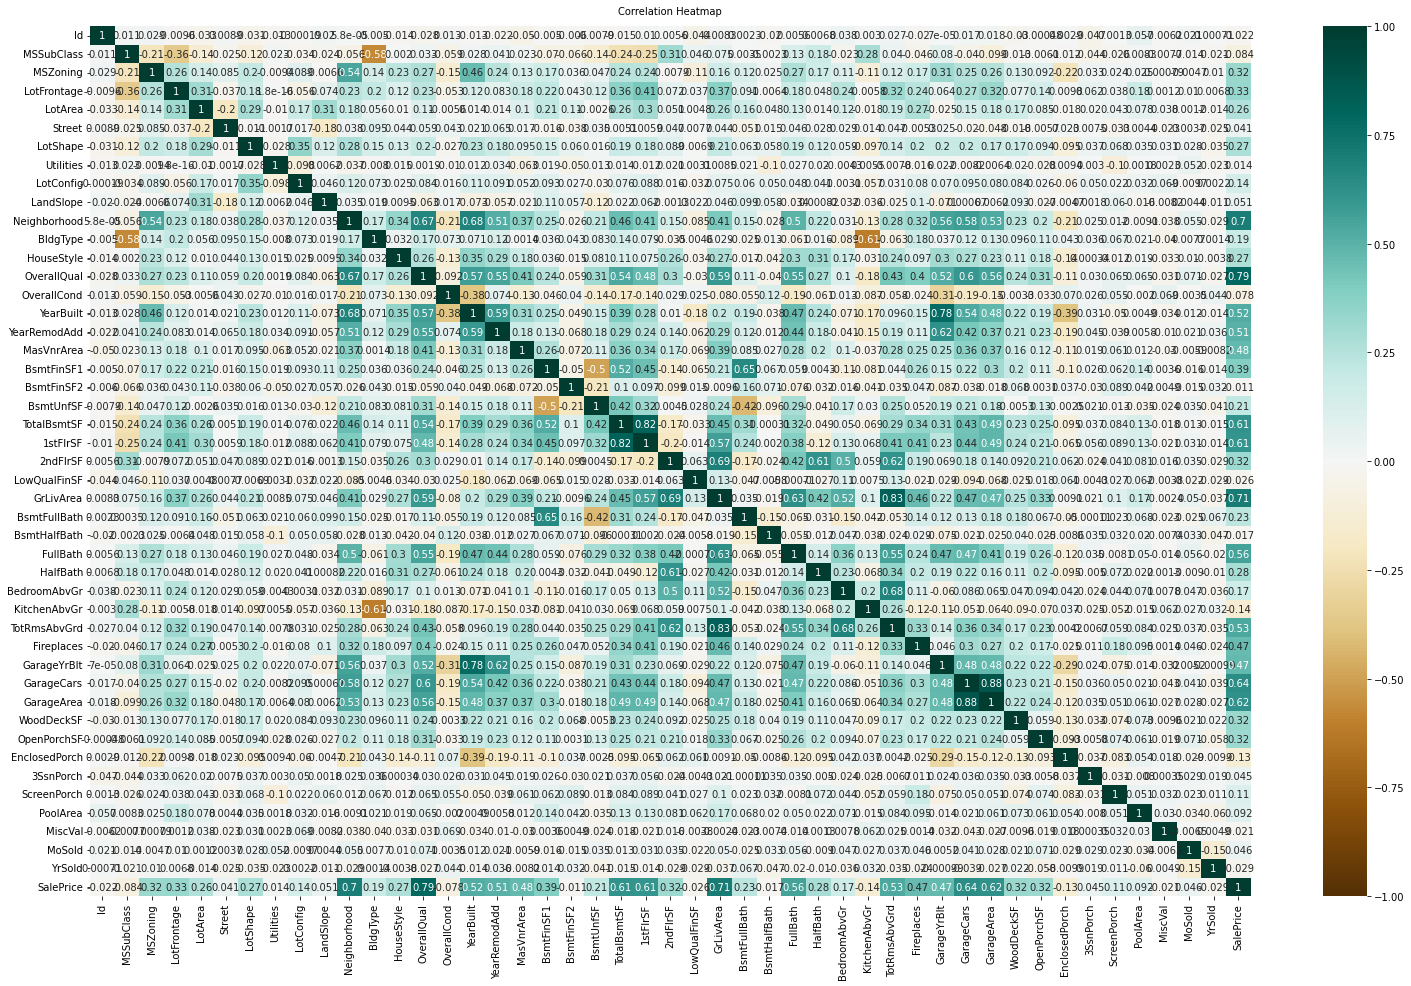

In [149]:
import seaborn as sns
plt.figure(figsize=(26, 16))
cor = df1.corr()
heatmap = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

In [150]:
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.05]
relevant_features
relevant_df = df1[relevant_features.index]
relevant_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
0,60,3,65.0,8450,0,0,0,16,1,6,...,0,2003.0,2,548,0,61,0,0,0,208500
1,20,3,80.0,9600,0,0,0,20,1,5,...,1,1976.0,2,460,298,0,0,0,0,181500
2,60,3,68.0,11250,1,0,0,16,1,6,...,1,2001.0,2,608,0,42,0,0,0,223500
3,70,3,60.0,9550,1,0,0,17,1,6,...,1,1998.0,3,642,0,35,272,0,0,140000
4,60,3,84.0,14260,1,0,0,24,1,6,...,1,2000.0,3,836,192,84,0,0,0,250000


In [151]:
relevant_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
SalePrice        0
dtype: int64

In [152]:
# cleaned_df = relevant_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
# cleaned_df.isnull().sum()

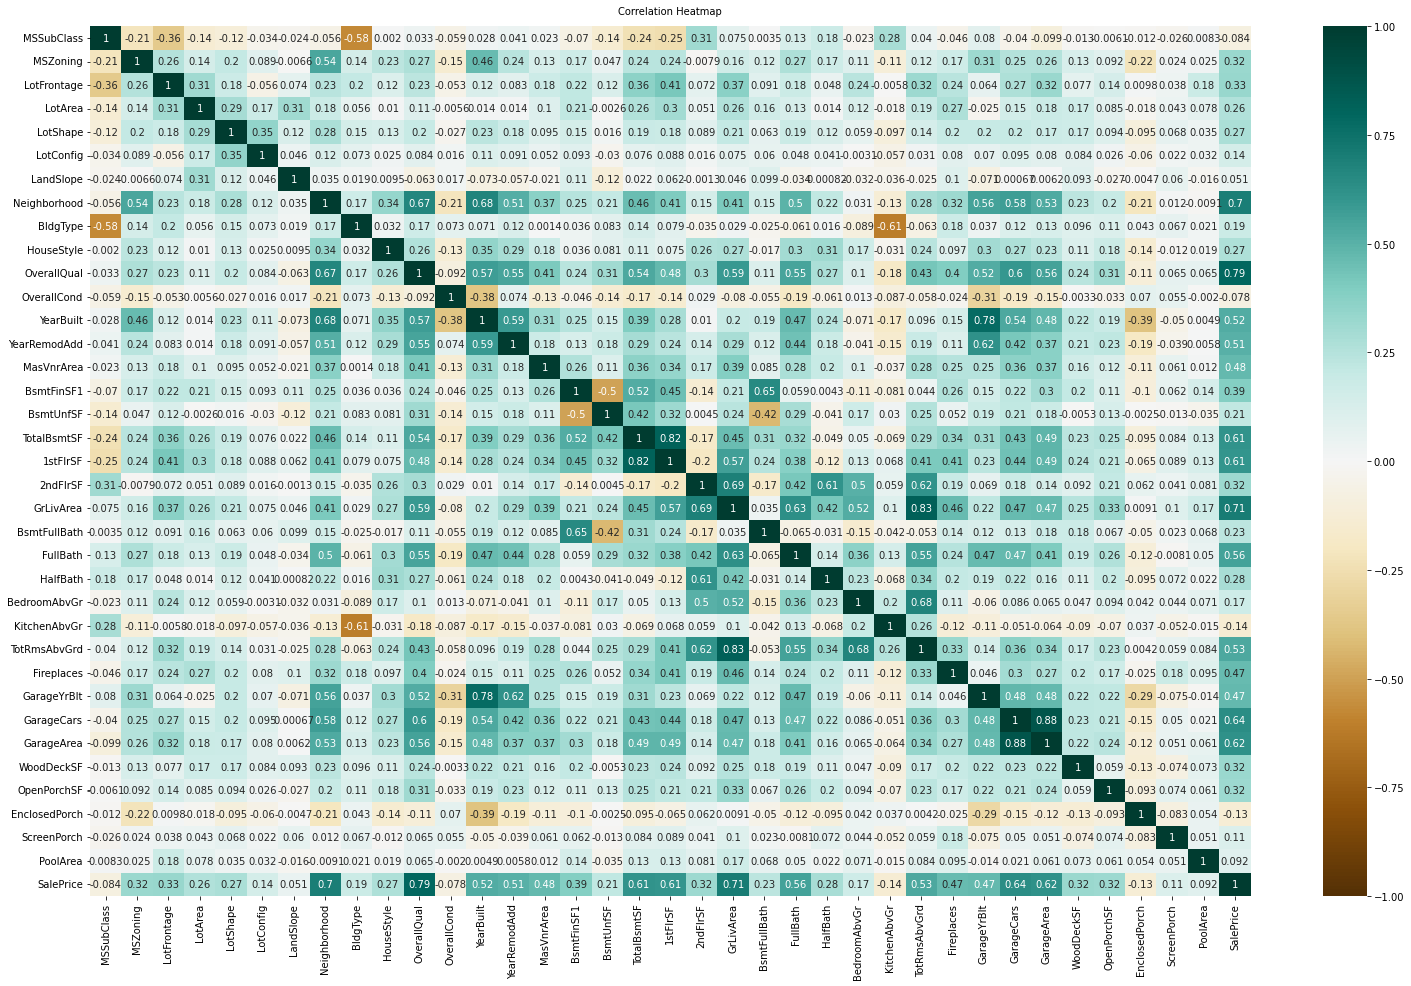

In [153]:
plt.figure(figsize=(26, 16))
cor = relevant_df.corr()
heatmap = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

Now, lets establish a "Base line" for our models. we will assume that all the houses prices is the mean price and check how much is this assumption far from the truth.

In [154]:
sum_prices = train_df['SalePrice'].sum()
mean_price = sum_prices/len(train_df['SalePrice'])
sum_error = 0
for i in range(len(train_df['SalePrice'])):
    sum_error = sum_error + abs(train_df['SalePrice'].iloc[i] - mean_price)
    
base_line_pred = sum_error/len(train_df['SalePrice'])  
base_line_pred

57434.770275849274

57,473$ - that is our "Mean Absolute Error" when we are not using any machine learning model.

In [155]:
relevant_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [156]:
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LotConfig      1460 non-null   int64  
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   int64  
 8   BldgType       1460 non-null   int64  
 9   HouseStyle     1460 non-null   int64  
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  MasVnrArea     1460 non-null   float64
 15  BsmtFinSF1     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  1stFlrSF

In [157]:
relevant_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
0,60,3,65.0,8450,0,0,0,16,1,6,...,0,2003.0,2,548,0,61,0,0,0,208500
1,20,3,80.0,9600,0,0,0,20,1,5,...,1,1976.0,2,460,298,0,0,0,0,181500
2,60,3,68.0,11250,1,0,0,16,1,6,...,1,2001.0,2,608,0,42,0,0,0,223500
3,70,3,60.0,9550,1,0,0,17,1,6,...,1,1998.0,3,642,0,35,272,0,0,140000
4,60,3,84.0,14260,1,0,0,24,1,6,...,1,2000.0,3,836,192,84,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,0,0,0,14,1,6,...,1,1999.0,2,460,0,40,0,0,0,175000
1456,20,3,85.0,13175,0,0,0,13,1,5,...,2,1978.0,2,500,349,0,0,0,0,210000
1457,70,3,66.0,9042,0,0,0,17,1,6,...,2,1941.0,1,252,0,60,0,0,0,266500
1458,20,3,68.0,9717,0,0,0,10,1,5,...,0,1950.0,1,240,366,0,112,0,0,142125


In [158]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

feature_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea']
X_train = relevant_df[feature_cols]
y_train = relevant_df["SalePrice"]
X_test = test_df[feature_cols]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=220, max_depth = 40,random_state=1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [169]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print("Mean squared error is:",metrics.mean_squared_error(y_train[0:1459], y_pred))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_train[0:1459], y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train[0:1459], y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_train[0:1459],y_pred))
print('R2:',metrics.r2_score(y_train[0:1459], y_pred))

Mean squared error is: 11832537231.601782
Mean Absolute Error(MAE): 78790.82453735435
Root Mean Squared Error (RMSE): 108777.46656179203
Explained Variance Score (EVS): -0.8711494313569828
R2: -0.8751014288620422


In [161]:
# n_estimators = [5,20,50,100,150,200,220,250,300] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
# max_depth = [int(x) for x in np.linspace(10, 120, num = 10)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

# random_grid = {'n_estimators': n_estimators,

# 'max_features': max_features,

# 'max_depth': max_depth,

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

In [162]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
#                n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
# rf_random.fit(X_train, y_train)

In [163]:
# rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [170]:
rf=RandomForestClassifier(n_estimators = 200, max_depth = 83,
 min_samples_split = 2,
 bootstrap = False)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
print("Mean squared error is:",metrics.mean_squared_error(y_train[0:1459], y_pred))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_train[0:1459], y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
rf.score(X_train, y_train)
rf = round(rf.score(X_train, y_train) * 100, 2)
rf

**K Nearest Neighbors model**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

mean_abs_errors_knn = []
for i in range(2,60,2):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    mae_knn = metrics.mean_absolute_error(y_train[0:1459], y_pred)
    mean_abs_errors_knn.append(mae_knn)
    
mean_abs_errors_knn    

In [ ]:
x_axis = [x for x in range(2,60,2)]
sns.lineplot(x=x_axis, y=mean_abs_errors_knn)

In [ ]:
knn=KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
mae_knn_best = metrics.mean_absolute_error(y_train[0:1459], y_pred)
mae_knn_best

**Linear Regression model**

In [164]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(X_train,y_train)
line_fitter_pred = line_fitter.predict(X_test)
line_fitter_pred_mae = metrics.mean_absolute_error(y_train[0:1459], line_fitter_pred)
line_fitter_pred_mae

80784.75497241797

In [165]:
full_data_rf = RandomForestClassifier(n_estimators = 220,
 max_depth = 22,
 min_samples_split = 2,
 bootstrap = False, random_state=1)
full_data_rf.fit(X,y)
test_data = test_df[feature_cols]
test_preds = full_data_rf.predict(test_data)
full_data_mae = metrics.mean_absolute_error(test_preds, y[0:1459]) 
full_data_mae

79168.7813570939

In [166]:
full_data_LR = LinearRegression()
full_data_LR.fit(X,y)
test_data_LR = test_df[feature_cols]
test_preds_LR = full_data_LR.predict(test_data_LR)
full_data_mae_LR = metrics.mean_absolute_error(test_preds_LR, y[0:1459]) 
full_data_mae_LR

80784.75497241797

In [167]:
full_data_KNN = KNeighborsClassifier(n_neighbors = 60)
full_data_KNN.fit(X,y)
test_data_KNN = test_df[feature_cols]
test_preds_KNN = full_data_KNN.predict(test_data_KNN)
full_data_mae_KNN = metrics.mean_absolute_error(test_preds_KNN, y[0:1459]) 
full_data_mae_KNN

64558.95133653187

When we Testing our models on the test dataframe - the model that was the closest is the "K Nearset Neighbors". So we will submit it's predictions. 

In [168]:
output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': test_preds_KNN})
output.to_csv('submission.csv', index=False)
output

,Id,SalePrice
0,1461,82500
1,1462,187500
2,1463,187500
3,1464,140000
4,1465,87000
...,...,...
1454,2915,151000
1455,2916,151000
1456,2917,190000
1457,2918,115000
